**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
suppressMessages(suppressWarnings(library("GenomicRanges")))
library("LOLA")
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import RegionDB

In [2]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input",
    "enrichment_lola",
    "regionDB_test"
)

regionDB = loadRegionDB(fdiry, useCache = TRUE)

Reading collection annotations: 

	encode_chipseq_tf_k562: found collection annotation:/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/KS91_K562_ASTARRseq_peak_macs_input/enrichment_lola/regionDB_test/encode_chipseq_tf_k562/collection.txt

Reading region annotations...

::Loading cache::	/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/KS91_K562_ASTARRseq_peak_macs_input/enrichment_lola/regionDB_test/encode_chipseq_tf_k562//encode_chipseq_tf_k562_files.RData

encode_chipseq_tf_k562

::Loading cache::	/data/reddylab/Kuei/out/proj_combeffect_encode_fcc/results/region/KS91_K562_ASTARRseq_peak_macs_input/enrichment_lola/regionDB_test/encode_chipseq_tf_k562/encode_chipseq_tf_k562.RData



The following code would crash the runLOLA function
```
names(regionDB$regionGRL) = regionDB$regionAnno$antibody
regionDB$regionGRL
```

## Import regions

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input",
    "summary"
)

fname = "peak.screened.fcc.total.tsv"
fpath = file.path(fdiry, fname)
dat   = read_tsv(fpath, show_col_types = FALSE)

dat_peak_fcc_total = dat
print(dim(dat))

fname = "peak.screened.fcc.active.tsv"
fpath = file.path(fdiry, fname)
dat   = read_tsv(fpath, show_col_types = FALSE)

dat_peak_fcc_active = dat
print(dim(dat))

[1] 732434      7
[1] 167127      6


In [4]:
dat = dat_peak_fcc_total
head(dat)

Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [5]:
dat = dat_peak_fcc_active
head(dat)

Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,101198203,101199537,chr1:101198203-101199537,ASTARR,ASTARR_AB
chr1,1012902,1014502,chr1:1012902-1014502,ASTARR,ASTARR_AB
chr1,109213422,109215054,chr1:109213422-109215054,ASTARR,ASTARR_AB
chr1,109218538,109219133,chr1:109218538-109219133,ASTARR,ASTARR_AB
chr1,109388963,109390708,chr1:109388963-109390708,ASTARR,ASTARR_AB
chr1,109476546,109477209,chr1:109476546-109477209,ASTARR,ASTARR_AB


## Arrange regions files

**Split by assay type**

In [6]:
lst_dat_peak_fcc_active = dat_peak_fcc_active %>% split(., .$Assay_Type)
lst_dat_peak_fcc_total  = dat_peak_fcc_total  %>% split(., .$Assay_Type)

**Total regions**

In [7]:
### init
lst = lst_dat_peak_fcc_total

### create GRangeList for assays
lst = lapply(lst, function(dat) {
    grg = makeGRangesFromDataFrame(
        dat,
        #keep.extra.columns=FALSE,
        ignore.strand  = TRUE,
        seqinfo        = NULL,
        seqnames.field = "Chrom",
        start.field    = "Start",
        end.field      = "End",
        starts.in.df.are.0based=TRUE)
    return(grg)
})
lst = GRangesList(lst)

### assign and show
lst_grg_peak_fcc_total = lst

In [8]:
lst = lst_dat_peak_fcc_total
dat = lst[[1]]

print(names(lst))
head(dat, 3)

[1] "ASTARR"                "CRISPRi-Growth"        "CRISPRi-HCRFF"        
[4] "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T


In [10]:
lst = lst_grg_peak_fcc_total
grg = lst[[1]]

print(names(lst))
print(grg)

[1] "ASTARR"                "CRISPRi-Growth"        "CRISPRi-HCRFF"        
[4] "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               
GRanges object with 246850 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1 100006257-100006880      *
       [2]     chr1 100010438-100010915      *
       [3]     chr1   10002088-10003910      *
       [4]     chr1 100021299-100021629      *
       [5]     chr1 100023728-100023976      *
       ...      ...                 ...    ...
  [246846]     chrX   98850592-98850902      *
  [246847]     chrX     9885197-9885587      *
  [246848]     chrX     9894545-9895641      *
  [246849]     chrX       989807-990542      *
  [246850]     chrX     9995768-9996126      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths


**Significant regions**

In [11]:
### init
lst = lst_dat_peak_fcc_active
vec = names(lst)
names(vec) = vec
vec_txt_assay = vec

### create a list of "GRangeList" for assays
lst = lapply(vec_txt_assay, function(txt_assay){

    ### filter
    dat = lst_dat_peak_fcc_total[[txt_assay]]
    vec = dat$Peak

    dat = lst_dat_peak_fcc_active[[txt_assay]]
    dat = dat %>% dplyr::filter(Peak %in% vec) %>% dplyr::distinct()
    
    ###
    lst_inner = split(dat, dat$Assay_Label)
    lst_inner = lapply(lst_inner, function(dat){
        grg = makeGRangesFromDataFrame(
            dat,
            ignore.strand  = TRUE,
            seqinfo        = NULL,
            seqnames.field = "Chrom",
            start.field    = "Start",
            end.field      = "End",
            starts.in.df.are.0based=TRUE)
        return(grg)
    })

    ###
    #txt_label = paste(txt_assay, "A", sep="_")
    #lst_inner = lst_inner[txt_label]
    
    ###
    lst_inner = GRangesList(lst_inner)
    return(lst_inner)
})

### assign and show
lst_grg_peak_fcc_active = lst
print(names(lst))

[1] "ASTARR"                "CRISPRi-Growth"        "CRISPRi-HCRFF"        
[4] "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [12]:
lst_grg_peak_fcc_active[["ASTARR"]]

GRangesList object of length 3:
$ASTARR_A
GRanges object with 7427 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 100132371-100133575      *
     [2]     chr1 100351003-100353319      *
     [3]     chr1 100785474-100786391      *
     [4]     chr1 101198204-101199537      *
     [5]     chr1     1012903-1014502      *
     ...      ...                 ...    ...
  [7423]     chrX     9342067-9343227      *
  [7424]     chrX     9351592-9353468      *
  [7425]     chrX     9462774-9466539      *
  [7426]     chrX   95903361-95903991      *
  [7427]     chrX       989807-990542      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

$ASTARR_AB
GRanges object with 2799 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 101198204-101199537      *
     [2]     chr1     1012903-1014502 

## Run the enrichment

In [13]:
### init
lst = lst_dat_peak_fcc_active
vec = names(lst)
names(vec) = vec
vec_txt_assay = vec

### run LOLA for each assay
lst = lapply(vec_txt_assay, function(txt_assay){
    ###
    grg_peak_total = lst_grg_peak_fcc_total[[txt_assay]]
    grg_peak_test  = lst_grg_peak_fcc_active[[txt_assay]]

    ###
    cat("Run LOLA on assay:", txt_assay, "\n")
    res = runLOLA(
        grg_peak_test,
        grg_peak_total,
        regionDB
    )

    return(res)
})

### assign
lst_dat_lola_results = lst

Run LOLA on assay: ASTARR 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: CRISPRi-Growth 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: CRISPRi-HCRFF 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: ENCODE-E2G_Benchmark 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: ENCODE-E2G_Prediction 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: LMPRA 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: TMPRA 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



Run LOLA on assay: WSTARR 


Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



In [14]:
dat = lst[[1]]
head(dat)

userSet,dbSet,collection,pValueLog,oddsRatio,support,rnkPV,rnkOR,rnkSup,maxRnk,⋯,c,d,description,cellType,tissue,antibody,treatment,dataSource,filename,size
<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
ASTARR_A,6,encode_chipseq_tf_k562,322.0052,23.32439,4895,1,1,1,1,⋯,2532,221098,ENCSR000EGE;ENCFF702XPO;EP300;Homo sapiens K562,K562,NA,EP300,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EGE.ENCFF702XPO.EP300.bed.gz,1722
ASTARR_AB,6,encode_chipseq_tf_k562,322.0052,39.48147,2206,1,1,1,1,⋯,593,223037,ENCSR000EGE;ENCFF702XPO;EP300;Homo sapiens K562,K562,NA,EP300,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EGE.ENCFF702XPO.EP300.bed.gz,1722
ASTARR_R,16,encode_chipseq_tf_k562,322.0052,26.70781,7353,1,2,1,2,⋯,3857,219939,ENCSR998AJK;ENCFF777PKJ;NRF1;Homo sapiens K562,K562,NA,NRF1,NA,"Michael Snyder, Stanford;ENCODE3",K562.ENCSR998AJK.ENCFF777PKJ.NRF1.bed.gz,2440
ASTARR_AB,3,encode_chipseq_tf_k562,322.0052,30.85735,1879,1,2,2,2,⋯,920,228901,ENCSR000EFS;ENCFF190CGV;JUN;Homo sapiens K562,K562,NA,JUN,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EFS.ENCFF190CGV.JUN.bed.gz,1397
ASTARR_A,3,encode_chipseq_tf_k562,322.0052,20.46745,4014,1,2,3,3,⋯,3413,226408,ENCSR000EFS;ENCFF190CGV;JUN;Homo sapiens K562,K562,NA,JUN,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EFS.ENCFF190CGV.JUN.bed.gz,1397
ASTARR_A,10,encode_chipseq_tf_k562,322.0052,17.13082,4646,1,3,2,3,⋯,2781,218150,ENCSR091GVJ;ENCFF627RSK;ATF1;Homo sapiens K562 stably expressing ATF1,K562,NA,ATF1,NA,"Michael Snyder, Stanford;ENCODE3",K562.ENCSR091GVJ.ENCFF627RSK.ATF1.bed.gz,3033


In [26]:
lst = lst_dat_lola_results
dat = bind_rows(lst, .id = "Assay_Type")

dat = dat %>% 
    dplyr::mutate(Assay_Label = paste(Assay_Type, "A", sep="_")) %>%
    dplyr::filter(Assay_Label == userSet) %>%
    dplyr::select(Assay_Type, userSet, antibody, oddsRatio, pValueLog)

dat_lola_results = dat
print(dim(dat))
head(dat)

[1] 128   5


Assay_Type,userSet,antibody,oddsRatio,pValueLog
<chr>,<chr>,<chr>,<dbl>,<dbl>
ASTARR,ASTARR_A,EP300,23.32439,322.0052
ASTARR,ASTARR_A,JUN,20.46745,322.0052
ASTARR,ASTARR_A,ATF1,17.13082,322.0052
ASTARR,ASTARR_A,ZEB2,14.43867,322.0052
ASTARR,ASTARR_A,YY1,11.53758,322.0052
ASTARR,ASTARR_A,REST,13.30482,322.0052


In [25]:
summary(dat$pValueLog)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   11.84  106.48  154.71  322.01  322.01 

In [30]:
dat = dat_lola_results
dat = dat %>% dplyr::filter(pValueLog   >= 20)
print(dim(dat))

[1] 81  5


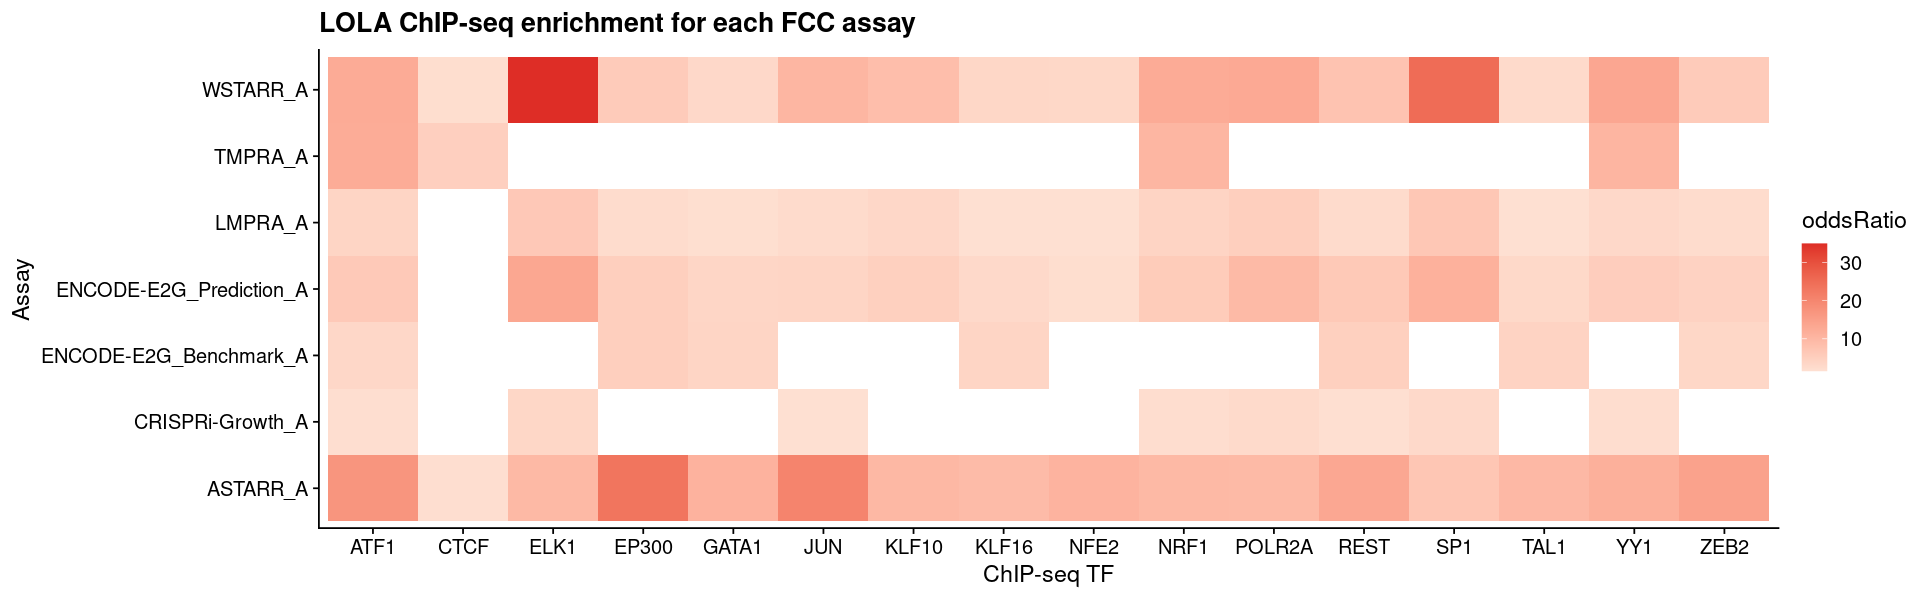

In [31]:
gpt = ggplot(dat, aes(x = antibody, y = userSet, fill = oddsRatio)) + 
    geom_tile() + 
    labs(x = "ChIP-seq TF", y = "Assay", title = "LOLA ChIP-seq enrichment for each FCC assay") +
    scale_fill_gradient(low="#fee0d2", high="#de2d26") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=16)
print(gpt)

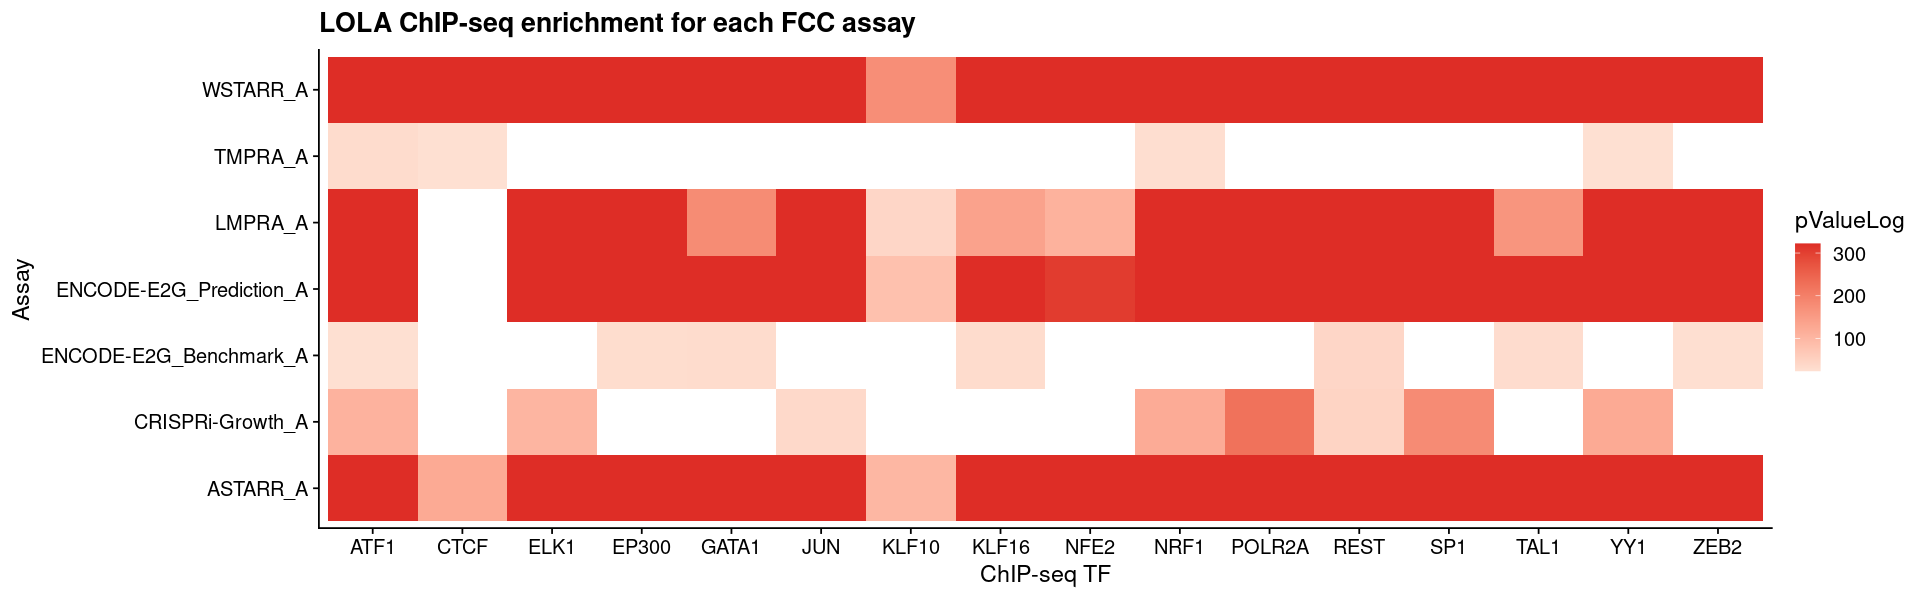

In [32]:
gpt = ggplot(dat, aes(x = antibody, y = userSet, fill = pValueLog)) + 
    geom_tile() + 
    labs(x = "ChIP-seq TF", y = "Assay", title = "LOLA ChIP-seq enrichment for each FCC assay") +
    scale_fill_gradient(low="#fee0d2", high="#de2d26") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=16)
print(gpt)

In [ ]:
dat = res
dat = dat %>% dplyr::select(userSet, antibody, oddsRatio)
gpt = ggplot(dat, aes(x = antibody, y = userSet, fill = oddsRatio)) + 
    geom_tile() + 
    scale_fill_gradient(low="#fee0d2", high="#de2d26") +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [63]:
data("sample_universe", package="LOLA")
data("sample_input", package="LOLA")

In [64]:
userSets

GRangesList object of length 2:
$setA
GRanges object with 3142 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]     chr1     437151-438164      *
     [2]     chr1     875730-878363      *
     [3]     chr1     933387-937410      *
     [4]     chr1     967966-970238      *
     [5]     chr1   1016863-1017439      *
     ...      ...               ...    ...
  [3138]     chrY   9364545-9364859      *
  [3139]     chrY   9385471-9385777      *
  [3140]     chrY 14532115-14533600      *
  [3141]     chrY 23696580-23696878      *
  [3142]     chrY 26959489-26959716      *
  -------
  seqinfo: 69 sequences from an unspecified genome; no seqlengths

$setB
GRanges object with 5831 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]     chr1       28735-29810      *
     [2]     chr1     544738-546649      *
     [3]     chr1     713984-714547 

In [65]:
userUniverse

GRanges object with 26829 ranges and 0 metadata columns:
          seqnames            ranges strand
             <Rle>         <IRanges>  <Rle>
      [1]     chr1       28735-29810      *
      [2]     chr1     135124-135563      *
      [3]     chr1     327790-328229      *
      [4]     chr1     437151-438164      *
      [5]     chr1     449273-450544      *
      ...      ...               ...    ...
  [26825]     chrY 27610115-27611088      *
  [26826]     chrY 28555535-28555932      *
  [26827]     chrY 28773315-28773544      *
  [26828]     chrY 59213794-59214183      *
  [26829]     chrY 59349266-59349574      *
  -------
  seqinfo: 69 sequences from an unspecified genome; no seqlengths

In [ ]:
### init
dat = dat_peak_fcc_active

### create a list of "GRangeList" for assays
lst = split(dat, dat$Assay_Type)
lst = lapply(lst, function(dat){
    tmp = 
    tmp = lapply
    grg = makeGRangesFromDataFrame(
        dat,
        ignore.strand  = TRUE,
        seqinfo        = NULL,
        seqnames.field = "Chrom",
        start.field    = "Start",
        end.field      = "End",
        starts.in.df.are.0based=TRUE)
    return(grg)
})
lst = GRangesList(lst)


### assign and show
lst_grg_peak_astarr_signif = lst
print(names(lst))
print(lst)

In [5]:
dat = dat_peak_fcc_total
dat = dat %>% dplyr::filter(Assay_Type == "ASTARR")
res = table(dat$Assay_Type)

#dat_peak_astarr_total = dat
#dat = dat_peak_astarr_total

grg = makeGRangesFromDataFrame(
    dat,
    #keep.extra.columns=FALSE,
    ignore.strand  = TRUE,
    seqinfo        = NULL,
    seqnames.field = "Chrom",
    start.field    = "Start",
    end.field      = "End",
    starts.in.df.are.0based=TRUE)

###
grg_peak_astarr_total = grg
print(res)
print(grg)


ASTARR 
246850 
GRanges object with 246850 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1 100006257-100006880      *
       [2]     chr1 100010438-100010915      *
       [3]     chr1   10002088-10003910      *
       [4]     chr1 100021299-100021629      *
       [5]     chr1 100023728-100023976      *
       ...      ...                 ...    ...
  [246846]     chrX   98850592-98850902      *
  [246847]     chrX     9885197-9885587      *
  [246848]     chrX     9894545-9895641      *
  [246849]     chrX       989807-990542      *
  [246850]     chrX     9995768-9996126      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths


In [6]:
dat = dat_peak_fcc_active
dat = dat %>% dplyr::filter(Assay_Type == "ASTARR")
lst = split(dat, dat$Assay_Label)
res = table(dat$Assay_Label)

#dat_peak_astarr_signif = dat
lst = lapply(lst, function(dat){
    grg = makeGRangesFromDataFrame(
        dat,
        #keep.extra.columns=FALSE,
        ignore.strand  = TRUE,
        seqinfo        = NULL,
        seqnames.field = "Chrom",
        start.field    = "Start",
        end.field      = "End",
        starts.in.df.are.0based=TRUE)
    return(grg)
})
lst = GRangesList(lst)


### assign and show
lst_grg_peak_astarr_signif = lst
print(names(lst))
print(lst)

[1] "ASTARR_A"  "ASTARR_AB" "ASTARR_R" 
GRangesList object of length 3:
$ASTARR_A
GRanges object with 7427 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 100132371-100133575      *
     [2]     chr1 100351003-100353319      *
     [3]     chr1 100785474-100786391      *
     [4]     chr1 101198204-101199537      *
     [5]     chr1     1012903-1014502      *
     ...      ...                 ...    ...
  [7423]     chrX     9342067-9343227      *
  [7424]     chrX     9351592-9353468      *
  [7425]     chrX     9462774-9466539      *
  [7426]     chrX   95903361-95903991      *
  [7427]     chrX       989807-990542      *
  -------
  seqinfo: 56 sequences from an unspecified genome; no seqlengths

$ASTARR_AB
GRanges object with 2799 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 101198204-101199537      

In [7]:
res = runLOLA(
    lst_grg_peak_astarr_signif,
    grg_peak_astarr_total,
    regionDB)

Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



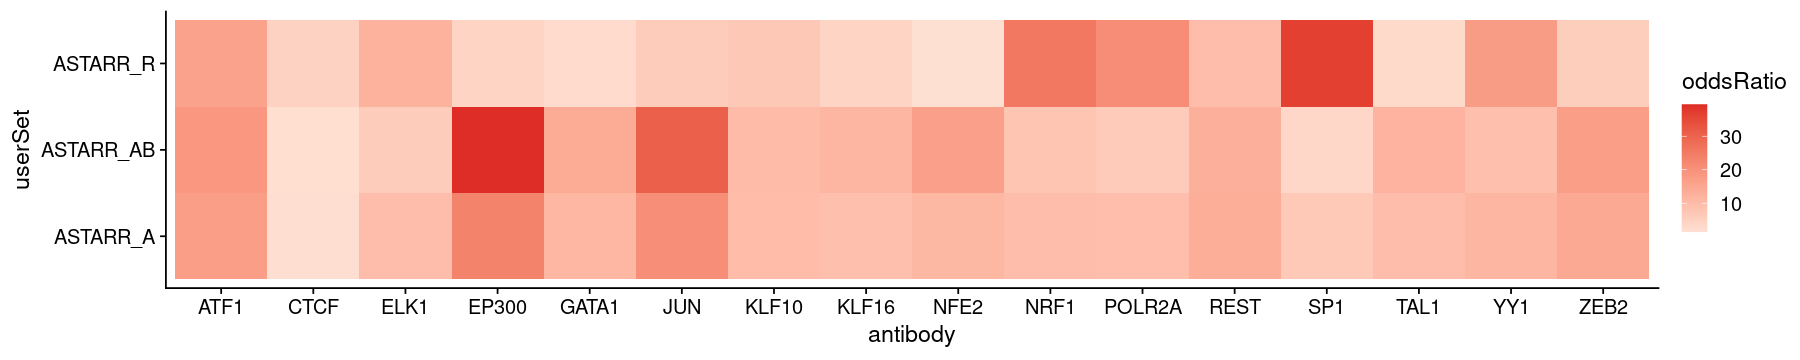

In [15]:
dat = res
dat = dat %>% dplyr::select(userSet, antibody, oddsRatio)
gpt = ggplot(dat, aes(x = antibody, y = userSet, fill = oddsRatio)) + 
    geom_tile() + 
    scale_fill_gradient(low="#fee0d2", high="#de2d26") +
    theme_cowplot()

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [ ]:
res = runLOLA(
    grg_astarr_active,
    grg_astarr_total,
    regionDB
)

In [9]:
dat = dat_peak_astarr_active

grg_astarr_active = grg
print(grg)

GRanges object with 7427 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1 100132371-100133575      *
     [2]     chr1 100351003-100353319      *
     [3]     chr1 100785474-100786391      *
     [4]     chr1 101198204-101199537      *
     [5]     chr1     1012903-1014502      *
     ...      ...                 ...    ...
  [7423]     chrX     9342067-9343227      *
  [7424]     chrX     9351592-9353468      *
  [7425]     chrX     9462774-9466539      *
  [7426]     chrX   95903361-95903991      *
  [7427]     chrX       989807-990542      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths


GRanges object with 246850 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1 100006257-100006880      *
       [2]     chr1 100010438-100010915      *
       [3]     chr1   10002088-10003910      *
       [4]     chr1 100021299-100021629      *
       [5]     chr1 100023728-100023976      *
       ...      ...                 ...    ...
  [246846]     chrX   98850592-98850902      *
  [246847]     chrX     9885197-9885587      *
  [246848]     chrX     9894545-9895641      *
  [246849]     chrX       989807-990542      *
  [246850]     chrX     9995768-9996126      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths


In [11]:
#res = runLOLA(userSets, userUniverse, regionDB, cores=1)
res = runLOLA(
    grg_astarr_active,
    grg_astarr_total,
    regionDB
)

Converting GRanges to GRangesList.

Calculating unit set overlaps...

Calculating universe set overlaps...

Calculating Fisher scores...



In [12]:
fun_display_table(res)

userSet,dbSet,collection,pValueLog,oddsRatio,support,rnkPV,rnkOR,rnkSup,maxRnk,meanRnk,b,c,d,description,cellType,tissue,antibody,treatment,dataSource,filename,size
1,6,encode_chipseq_tf_k562,322.00519,23.324393,4895,1,1,1,1,1.00,18325,2532,221098,ENCSR000EGE;ENCFF702XPO;EP300;Homo sapiens K562,K562,NA,EP300,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EGE.ENCFF702XPO.EP300.bed.gz,1722
1,3,encode_chipseq_tf_k562,322.00519,20.467452,4014,1,2,3,3,2.00,13015,3413,226408,ENCSR000EFS;ENCFF190CGV;JUN;Homo sapiens K562,K562,NA,JUN,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EFS.ENCFF190CGV.JUN.bed.gz,1397
1,10,encode_chipseq_tf_k562,322.00519,17.130824,4646,1,3,2,3,2.00,21273,2781,218150,ENCSR091GVJ;ENCFF627RSK;ATF1;Homo sapiens K562 stably expressing ATF1,K562,NA,ATF1,NA,"Michael Snyder, Stanford;ENCODE3",K562.ENCSR091GVJ.ENCFF627RSK.ATF1.bed.gz,3033
1,9,encode_chipseq_tf_k562,322.00519,14.438673,3600,1,4,4,4,3.00,14644,3827,224779,ENCSR004GKA;ENCFF242AOL;ZEB2;Homo sapiens K562,K562,NA,ZEB2,NA,"Michael Snyder, Stanford;ENCODE3",K562.ENCSR004GKA.ENCFF242AOL.ZEB2.bed.gz,1779
1,1,encode_chipseq_tf_k562,322.00519,11.537583,3578,1,6,5,6,4.00,17852,3849,221571,ENCSR000BMH;ENCFF398UQZ;YY1;Homo sapiens K562,K562,NA,YY1,NA,"Richard Myers, HAIB;ENCODE2",K562.ENCSR000BMH.ENCFF398UQZ.YY1.bed.gz,2399
1,2,encode_chipseq_tf_k562,322.00519,13.304816,3027,1,5,10,10,5.33,11775,4400,227648,ENCSR000BMW;ENCFF707MDI;REST;Homo sapiens K562,K562,NA,REST,NA,"Richard Myers, HAIB;ENCODE2",K562.ENCSR000BMW.ENCFF707MDI.REST.bed.gz,1580
1,8,encode_chipseq_tf_k562,322.00519,9.819121,3504,1,10,6,10,5.67,19963,3923,219460,ENCSR000EHB;ENCFF852ZRK;TAL1;Homo sapiens K562,K562,NA,TAL1,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EHB.ENCFF852ZRK.TAL1.bed.gz,1653
1,13,encode_chipseq_tf_k562,322.00519,10.940063,3075,1,8,8,8,5.67,14525,4352,224898,ENCSR552YGL;ENCFF023IFO;NFE2;Homo sapiens K562 stably expressing NFE2,K562,NA,NFE2,NA,"Michael Snyder, Stanford;ENCODE3",K562.ENCSR552YGL.ENCFF023IFO.NFE2.bed.gz,3100
1,16,encode_chipseq_tf_k562,322.00519,9.779478,3459,1,11,7,11,6.33,19595,3968,219828,ENCSR998AJK;ENCFF777PKJ;NRF1;Homo sapiens K562,K562,NA,NRF1,NA,"Michael Snyder, Stanford;ENCODE3",K562.ENCSR998AJK.ENCFF777PKJ.NRF1.bed.gz,2440
1,4,encode_chipseq_tf_k562,322.00519,11.111696,2403,1,7,12,12,6.67,9880,5024,229543,ENCSR000EFT;ENCFF657CTC;GATA1;Homo sapiens K562,K562,NA,GATA1,NA,"Michael Snyder, Stanford;ENCODE2",K562.ENCSR000EFT.ENCFF657CTC.GATA1.bed.gz,810
